# Hierarchical agglomerative clustering of cases

Computational notebook 04 for Climate adaptation plans in the context of coastal settlements: the case of Portugal.

Date: 27/06/2020

---

This notebooks standardize contextual characters and generates hierarchical clustering using Ward's method.

The only input required is `summative_data.csv` generated by `03_Calculate_contextual_characters.ipynb`.

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import preprocessing
import scipy as sp
from scipy.cluster import hierarchy

In [19]:
sklearn.__version__, sp.__version__, pd.__version__, matplotlib.__version__

('0.22.2.post1', '1.4.1', '1.0.3', '3.2.1')

In [5]:
path = 'data/summative_data.csv'
data = pd.read_csv(path, index_col=0)

In [14]:
data

,sdbAre_meanIQ,sdbAre_rangeIQ,sdbAre_TheilID,sdbPer_meanIQ,sdbPer_rangeIQ,sdbPer_TheilID,ssbCCo_meanIQ,ssbCCo_rangeIQ,ssbCCo_TheilID,ssbCor_meanIQ,...,lskElo_TheilID,likGra_meanIQ,likGra_rangeIQ,likGra_TheilID,meshedness_meanIQ,meshedness_rangeIQ,meshedness_TheilID,sdsLen_meanIQ,sdsLen_rangeIQ,sdsLen_TheilID
foz,0.145669,0.074895,0.193100,0.525362,0.350970,0.224825,-1.582175,1.289722,1.625614,1.418570,...,-0.500558,-0.697226,-0.574718,-0.106314,0.653276,1.034210,-0.241022,0.461052,0.724088,0.028703
aguda,-0.690154,-0.615406,-0.330468,-0.622020,-0.285571,0.065931,-1.052284,0.651961,0.757708,0.178081,...,-0.646004,0.214105,0.671245,0.384864,3.105235,-0.506306,-0.406828,-0.615518,-0.818046,-0.171664
esposende,1.115875,0.587245,-0.074543,1.378664,0.714241,0.637960,-0.652857,1.004727,2.057803,3.159203,...,-0.925142,-1.415258,-1.361038,-0.732511,-0.493201,0.752514,-0.121131,1.705268,0.855035,-0.215043
espinho,-0.488655,-0.837593,-1.292406,-0.390449,-0.837013,-1.101580,-0.588273,0.393074,0.295110,-0.233439,...,0.459406,0.392503,-0.281639,-0.869100,1.332040,1.199922,-0.237977,-0.760362,-0.396820,-0.561585
povoa,0.236331,-0.456906,-1.022082,0.668069,-0.988813,-1.366325,-2.686536,1.250063,1.949153,-0.219334,...,0.831341,-0.326971,-0.628027,-0.925107,0.984730,-1.043610,-0.412517,0.349350,0.067833,-0.482178
vila_do_conde,-0.641281,-0.900349,-0.805594,-0.418497,-0.874376,-0.637180,-2.273327,1.609617,1.781211,-1.563553,...,-0.070472,-0.198830,-0.096624,-0.492363,0.275276,-1.016189,-0.397444,0.581370,1.509812,0.174819
vila_praia,-0.236344,-0.309269,-0.563741,-0.073743,-0.406707,-0.725052,-0.558345,-0.296443,-0.394528,0.348525,...,0.939187,-0.260624,-0.311059,-0.872127,0.670659,0.543844,-0.272933,0.270958,1.681556,1.100864
costa_nova,-0.308560,-0.464835,-0.476125,-0.101839,-0.228026,-0.358866,-1.124209,1.882528,2.021040,-0.371011,...,-0.538544,-0.190119,-0.892778,-0.955551,1.154867,-0.383700,-0.307469,-0.042163,-0.185388,0.377693
praia_mira,-0.156279,-0.156343,-0.156052,-0.096126,0.027534,-0.099592,0.255449,0.101699,-0.231061,-0.226495,...,0.443046,-0.254146,0.846564,0.523876,0.986359,0.098466,-0.339244,-0.583534,0.030992,-0.248484
palheiros1,0.901566,-0.200327,-1.192465,0.846955,-0.757842,-1.256083,1.682114,-2.462428,-1.518385,-0.612414,...,-1.134958,-1.130611,-1.233345,-1.014853,-1.174709,-0.805875,-0.347904,-0.333674,-0.206665,-0.623030


## Standardize

In [15]:
x = data.values
scaler = preprocessing.StandardScaler()
cols = list(data.columns)
data[cols] = scaler.fit_transform(data[cols])
data

,sdbAre_meanIQ,sdbAre_rangeIQ,sdbAre_TheilID,sdbPer_meanIQ,sdbPer_rangeIQ,sdbPer_TheilID,ssbCCo_meanIQ,ssbCCo_rangeIQ,ssbCCo_TheilID,ssbCor_meanIQ,...,lskElo_TheilID,likGra_meanIQ,likGra_rangeIQ,likGra_TheilID,meshedness_meanIQ,meshedness_rangeIQ,meshedness_TheilID,sdsLen_meanIQ,sdsLen_rangeIQ,sdsLen_TheilID
foz,0.145669,0.074895,0.193100,0.525362,0.350970,0.224825,-1.582175,1.289722,1.625614,1.418570,...,-0.500558,-0.697226,-0.574718,-0.106314,0.653276,1.034210,-0.241022,0.461052,0.724088,0.028703
aguda,-0.690154,-0.615406,-0.330468,-0.622020,-0.285571,0.065931,-1.052284,0.651961,0.757708,0.178081,...,-0.646004,0.214105,0.671245,0.384864,3.105235,-0.506306,-0.406828,-0.615518,-0.818046,-0.171664
esposende,1.115875,0.587245,-0.074543,1.378664,0.714241,0.637960,-0.652857,1.004727,2.057803,3.159203,...,-0.925142,-1.415258,-1.361038,-0.732511,-0.493201,0.752514,-0.121131,1.705268,0.855035,-0.215043
espinho,-0.488655,-0.837593,-1.292406,-0.390449,-0.837013,-1.101580,-0.588273,0.393074,0.295110,-0.233439,...,0.459406,0.392503,-0.281639,-0.869100,1.332040,1.199922,-0.237977,-0.760362,-0.396820,-0.561585
povoa,0.236331,-0.456906,-1.022082,0.668069,-0.988813,-1.366325,-2.686536,1.250063,1.949153,-0.219334,...,0.831341,-0.326971,-0.628027,-0.925107,0.984730,-1.043610,-0.412517,0.349350,0.067833,-0.482178
vila_do_conde,-0.641281,-0.900349,-0.805594,-0.418497,-0.874376,-0.637180,-2.273327,1.609617,1.781211,-1.563553,...,-0.070472,-0.198830,-0.096624,-0.492363,0.275276,-1.016189,-0.397444,0.581370,1.509812,0.174819
vila_praia,-0.236344,-0.309269,-0.563741,-0.073743,-0.406707,-0.725052,-0.558345,-0.296443,-0.394528,0.348525,...,0.939187,-0.260624,-0.311059,-0.872127,0.670659,0.543844,-0.272933,0.270958,1.681556,1.100864
costa_nova,-0.308560,-0.464835,-0.476125,-0.101839,-0.228026,-0.358866,-1.124209,1.882528,2.021040,-0.371011,...,-0.538544,-0.190119,-0.892778,-0.955551,1.154867,-0.383700,-0.307469,-0.042163,-0.185388,0.377693
praia_mira,-0.156279,-0.156343,-0.156052,-0.096126,0.027534,-0.099592,0.255449,0.101699,-0.231061,-0.226495,...,0.443046,-0.254146,0.846564,0.523876,0.986359,0.098466,-0.339244,-0.583534,0.030992,-0.248484
palheiros1,0.901566,-0.200327,-1.192465,0.846955,-0.757842,-1.256083,1.682114,-2.462428,-1.518385,-0.612414,...,-1.134958,-1.130611,-1.233345,-1.014853,-1.174709,-0.805875,-0.347904,-0.333674,-0.206665,-0.623030


In [16]:
data.to_csv('data/summative_data_norm.csv')

## Clustering

In [17]:
Z = hierarchy.linkage(data, 'ward')

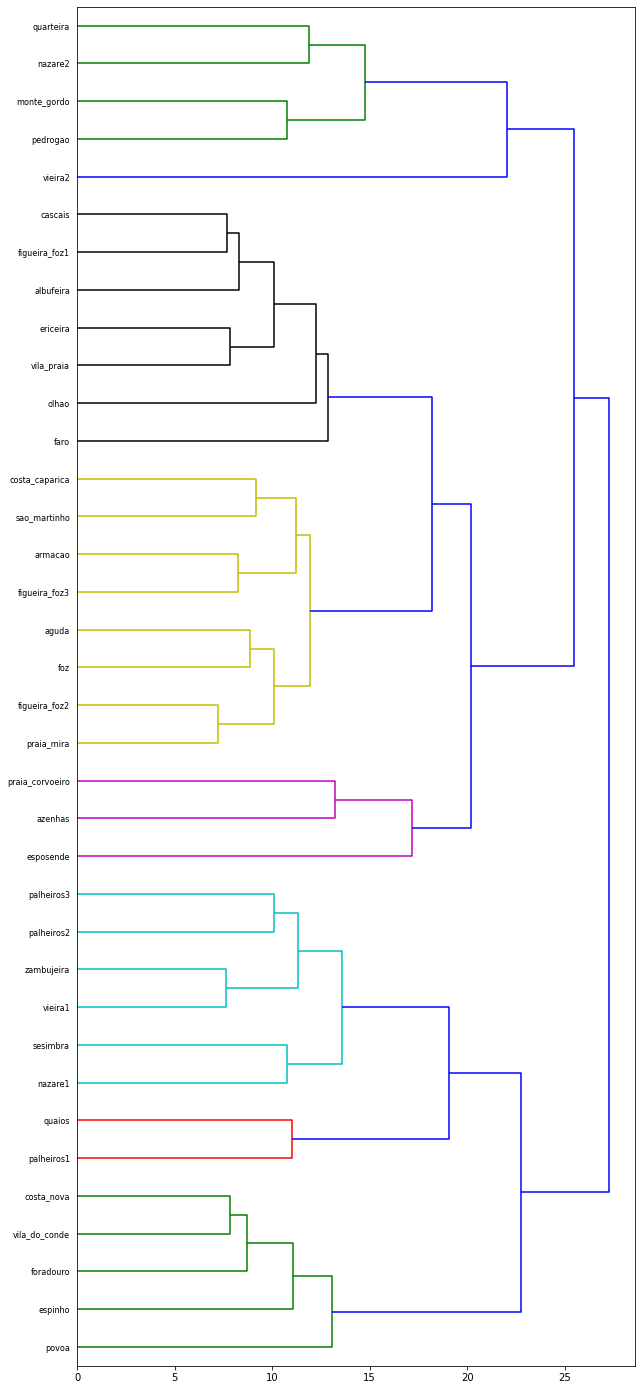

In [18]:
plt.figure(figsize=(10, 25))
dn = hierarchy.dendrogram(Z, labels=data.index, orientation='right',
                          color_threshold=18)
#plt.savefig('dendrogram_right.svg')

## Assing to places

In [ ]:
folder = 'data/'
parts = ['atlantic', 'preatl', 'premed', 'med']

c_parts = []
geoms = []
for part in parts:
    path = folder + part + '.gpkg'
    layers = [x[:-4] for x in fiona.listlayers(path) if 'blg' in x]
    for l in layers:
        buildings = gpd.read_file(path, layer=l + '_blg')
        
        if 'part' in buildings.columns:
            for bpart in set(buildings.part):
                subset = buildings.loc[buildings.part == bpart]
                geoms.append(subset.geometry.unary_union.centroid)
                c_parts.append(part)
        else:
            geoms.append(buildings.geometry.unary_union.centroid)
            c_parts.append(part)

In [ ]:
gdf = gpd.GeoDataFrame(data, geometry=geoms)
gdf['part'] = c_parts

In [ ]:
gdf['cl'] = hierarchy.fcluster(Z, 18, criterion='distance')
gdf['cl'] = gdf.cl.replace(8, 7)
gdf['cl'] = gdf.cl.replace(2, 3)

In [ ]:
gdf.reset_index().to_file('data/points.gpkg', driver='GPKG', layer='ward')